In [1]:
import numpy as np
from scipy import linalg, stats
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
sns.set()
%matplotlib inline

In [2]:
mdot = pd.read_pickle('RawEFV.pkl')  ### Just for index sake!!!
yraw = np.load('yraw.npy')
yrec = np.load('yrec.npy')
M = np.load('M.npy')
M = M.T

In [3]:
M.shape

(1, 5)

In [4]:
print(np.min(yraw),np.max(yraw))
print(np.min(yrec),np.max(yrec))

nan nan
0.0 1199.43185535


In [5]:
print(yraw.shape)
print(yrec.shape)

(47, 19872)
(47, 19872)


In [6]:
np.column_stack((yraw[0,].T,yrec[0,].T))

array([[ 986.73092372,  998.34818302],
       [ 979.13602712,  990.63462653],
       [ 986.32033731,  997.9058989 ],
       ..., 
       [ 854.5366217 ,  864.79062991],
       [ 858.41824214,  868.68914395],
       [ 858.59162031,  868.84145623]])

In [7]:
yraw.shape

(47, 19872)

In [8]:
print(yraw[11:16,:].sum(axis=0))
print(yrec[11:16,:].sum(axis=0))

[-0.54627026 -0.54098705 -0.54087617 ..., -0.46565373 -0.48068463
 -0.49011674]
[ 0.27212778  0.27144428  0.27169535 ...,  0.25279766  0.24956797
  0.25068447]


### Leak estimates

In [9]:
leak_raw  =  M @ yraw[11:16,:]
leak_rec  =  M @ yrec[11:16,:]

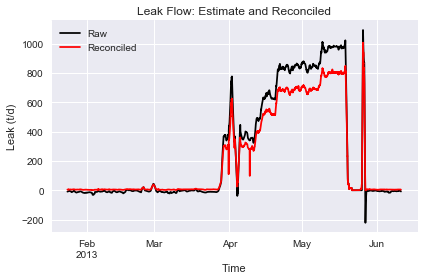

,Raw,Reconciled
count,19858.000000,19872.000000
mean,264.171093,225.298420
std,374.113293,302.669749
min,-221.796512,0.000001
25%,-8.851517,4.603612
50%,-1.330646,6.357199
75%,625.839381,518.287610
max,1091.981079,1005.989523


In [10]:
leak_mat = np.column_stack((leak_raw.T,leak_rec.T))
leakdf = pd.DataFrame(leak_mat, index=mdot.index)
leakdf.columns = ['Raw', 'Reconciled']
leakdf.plot(color=['k','r'])
#plt.ylim((0,1000)) #1.05*np.max(leak_raw)))
plt.ylabel('Leak (t/d)')
plt.title('Leak Flow: Estimate and Reconciled')
plt.tight_layout()
plt.savefig('leak_res.png', dpi = 300)
plt.show()
leakdf.describe()

### VC1 flow

In [11]:
M[0,0]

16.042459999999998

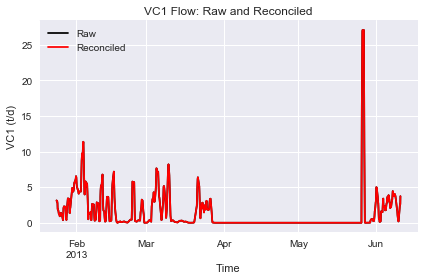

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,1.372296,1.372525e+00
std,2.809646,2.809574e+00
min,0.000000,5.514291e-10
25%,0.000000,1.603974e-07
50%,0.084374,8.486562e-02
75%,2.060448,2.060851e+00
max,27.051467,2.705676e+01


In [12]:
VC1_raw  =  M[0,0] * yraw[41,:]
VC1_rec  =  M[0,0] * yrec[41,:]
VC1_mat = np.column_stack((VC1_raw,VC1_rec))
VC1df = pd.DataFrame(VC1_mat, index=mdot.index)
VC1df.columns = ['Raw', 'Reconciled']
VC1df.plot(color=['k','r'])
#plt.ylim((0,1.05*np.max(VC1_raw)))
#plt.ylim((-1,1))
plt.ylabel('VC1 (t/d)')
plt.title('VC1 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('VC1_res.png', dpi = 300)
plt.show()
VC1df.describe()

### VC2 flow

In [13]:
M[0,1]

30.069040000000001

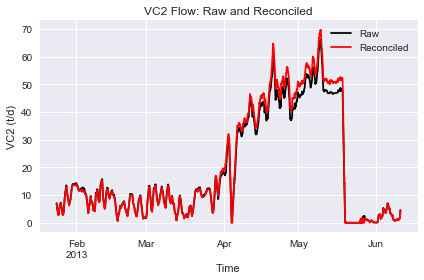

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,19.131389,2.010421e+01
std,18.564108,2.015213e+01
min,0.000000,2.414717e-09
25%,4.606171,4.475356e+00
50%,10.577787,1.032383e+01
75%,38.061155,4.115662e+01
max,66.082069,6.956605e+01


In [14]:
VC2_raw  =  M[0,1] * yraw[42,:]
VC2_rec  =  M[0,1] * yrec[42,:]
VC2_mat = np.column_stack((VC2_raw,VC2_rec))
VC2df = pd.DataFrame(VC2_mat, index=mdot.index)
VC2df.columns = ['Raw','Reconciled']
VC2df.plot(color=['k','r'])
#plt.ylim((0,1.05*np.max(VC2_raw)))
plt.ylabel('VC2 (t/d)')
plt.title('VC2 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('VC2_res.png', dpi = 300)
plt.show()
VC2df.describe()

### VC3 flow

In [15]:
M[0,2]

44.095619999999997

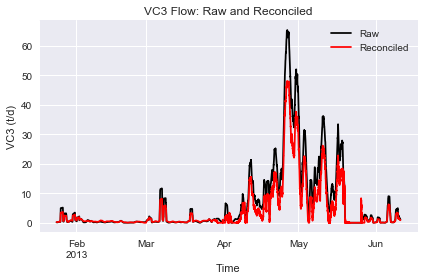

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,6.666643,4.460554e+00
std,11.789665,8.325106e+00
min,0.000000,2.117419e-10
25%,0.207518,2.589760e-01
50%,0.901415,7.025749e-01
75%,8.251396,4.528481e+00
max,65.332578,4.805235e+01


In [16]:
VC3_raw  =  M[0,2] * yraw[43,:]
VC3_rec  =  M[0,2] * yrec[43,:]
VC3_mat = np.column_stack((VC3_raw,VC3_rec))
VC3df = pd.DataFrame(VC3_mat, index=mdot.index)
VC3df.columns = ['Raw', 'Reconciled']
VC3df.plot(color=['k','r'])
#plt.ylim((0,1.05*np.max(VC3_raw)))
plt.ylabel('VC3 (t/d)')
plt.title('VC3 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('VC3_res.png', dpi = 300)
plt.show()
VC3df.describe()

### VN2 flow

In [17]:
M[0,4]

28.013400000000001

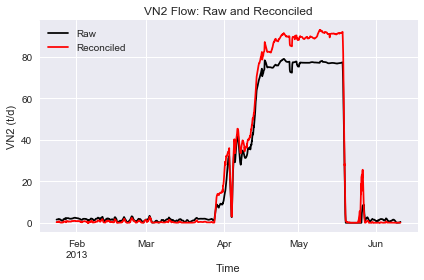

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,23.547240,2.681271e+01
std,32.142976,3.757670e+01
min,0.000000,4.092388e-09
25%,1.175225,1.580351e-01
50%,1.975003,7.791730e-01
75%,65.237660,7.282196e+01
max,79.008164,9.290675e+01


In [18]:
VN2_raw  =  M[0,4] * yraw[44,:]
VN2_rec  =  M[0,4] * yrec[44,:]
VN2_mat = np.column_stack((VN2_raw,VN2_rec))
VN2df = pd.DataFrame(VN2_mat, index=mdot.index)
VN2df.columns = ['Raw', 'Reconciled']
VN2df.plot(color=['k','r'])
#plt.ylim((0,1.05*np.max(VN2_rec)))
plt.ylabel('VN2 (t/d)')
plt.title('VN2 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('VN2_res.png', dpi = 300)
plt.show()
VN2df.describe()

### LC2 flow

In [19]:
M[0,1]

30.069040000000001

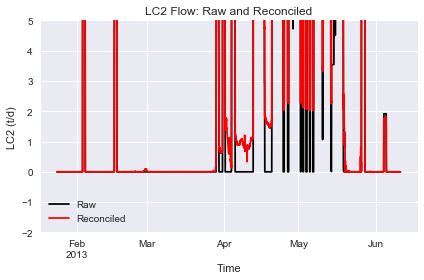

,Raw,Reconciled
count,1.987200e+04,1.987200e+04
mean,4.862829e+00,5.443192e+00
std,1.358604e+01,1.371865e+01
min,0.000000e+00,2.738413e-12
25%,2.960595e-16,1.486032e-07
50%,9.005142e-16,2.864287e-07
75%,5.637917e+00,7.222876e+00
max,1.246678e+02,1.245353e+02


In [20]:
LC2_raw  =  M[0,1] * yraw[45,:]
LC2_rec  =  M[0,1] * yrec[45,:]
LC2_mat = np.column_stack((LC2_raw,LC2_rec))
LC2df = pd.DataFrame(LC2_mat, index=mdot.index)
LC2df.columns = ['Raw', 'Reconciled']
LC2df.plot(color=['k','r'])
plt.ylim((-2,5))
plt.ylabel('LC2 (t/d)')
plt.title('LC2 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LC2_res.png', dpi = 300)
plt.show()
LC2df.describe()

### LC3 flow

In [21]:
M[0,2]

44.095619999999997

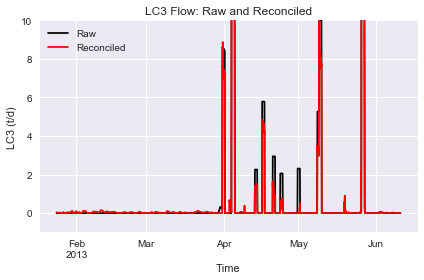

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,1.087832,9.587422e-01
std,6.943103,6.438641e+00
min,0.000000,7.922242e-11
25%,0.000000,3.126541e-07
50%,0.000000,5.485054e-07
75%,0.000000,4.508728e-02
max,79.487239,7.538563e+01


In [22]:
LC3_raw  =  M[0,3] * yraw[46,:]
LC3_rec  =  M[0,3] * yrec[46,:]
LC3_mat = np.column_stack((LC3_raw,LC3_rec))
LC3df = pd.DataFrame(LC3_mat, index=mdot.index)
LC3df.columns = ['Raw','Reconciled']
LC3df.plot(color=['k','r'])
plt.ylim((-1,10))
plt.ylabel('LC3 (t/d)')
plt.title('LC3 Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LC3_res.png', dpi = 300)
plt.show()
LC3df.describe()

### BleedL flows

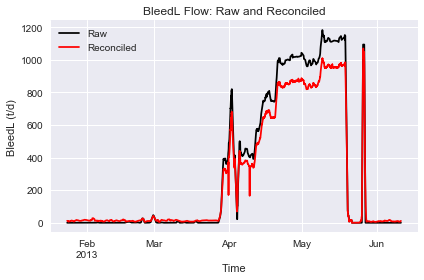

,Raw,Reconciled
count,19872.000000,19872.000000
mean,316.943897,279.324913
std,434.189035,367.755761
min,0.000000,0.000002
25%,0.000000,10.976307
50%,1.823790,15.720938
75%,747.523685,645.256708
max,1183.307080,1070.312352


In [23]:
BleedL_raw  =  M @ yraw[26:31,:]
BleedL_rec  =  M @ yrec[26:31,:]
BleedL_mat = np.column_stack((BleedL_raw.T,BleedL_rec.T))
BleedLdf = pd.DataFrame(BleedL_mat, index=mdot.index)
BleedLdf.columns = ['Raw', 'Reconciled']
BleedLdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('BleedL (t/d)')
plt.title('BleedL Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('BleedL_res.png', dpi = 300)
plt.show()
BleedLdf.describe()

### BleedH flows

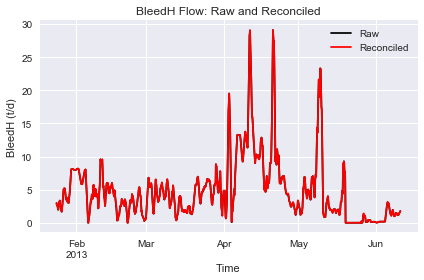

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,4.889955,4.894061e+00
std,4.706506,4.702119e+00
min,0.000000,4.423743e-07
25%,1.737239,1.750267e+00
50%,3.858528,3.861192e+00
75%,6.193217,6.187099e+00
max,29.106659,2.910356e+01


In [24]:
BleedH_raw  =  M @ yraw[36:41,:]
BleedH_rec  =  M @ yrec[36:41,:]
BleedH_mat = np.column_stack((BleedH_raw.T,BleedH_rec.T))
BleedHdf = pd.DataFrame(BleedH_mat, index=mdot.index)
BleedHdf.columns = ['Raw', 'Reconciled']
BleedHdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('BleedH (t/d)')
plt.title('BleedH Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('BleedH_res.png', dpi = 300)
plt.show()
BleedHdf.describe()

### DeM flow

In [25]:
M[0,0]

16.042459999999998

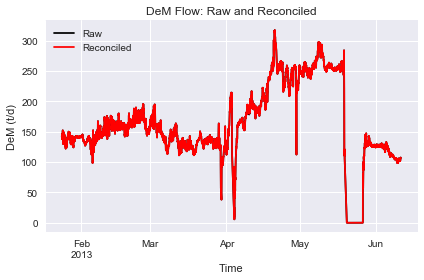

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,161.741264,1.617005e+02
std,64.023955,6.402148e+01
min,0.000000,1.591847e-07
25%,128.043325,1.279928e+02
50%,148.884353,1.488289e+02
75%,198.355221,1.983364e+02
max,317.465423,3.174073e+02


In [26]:
DeM_raw  =  M[0,0] * yraw[10,:]
DeM_rec  =  M[0,0] * yrec[10,:]
DeM_mat = np.column_stack((DeM_raw,DeM_rec))
DeMdf = pd.DataFrame(DeM_mat, index=mdot.index)
DeMdf.columns = ['Raw', 'Reconciled']
DeMdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('DeM (t/d)')
plt.title('DeM Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('DeM_res.png', dpi = 300)
plt.show()
DeMdf.describe()

### NG flow

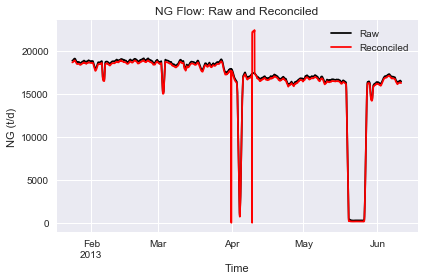

,Raw,Reconciled
count,19858.000000,1.987200e+04
mean,16533.640047,1.636453e+04
std,4229.062910,4.258807e+03
min,250.149966,2.730331e-08
25%,16627.553945,1.644298e+04
50%,17226.425978,1.703935e+04
75%,18689.911602,1.848829e+04
max,19126.178681,2.239709e+04


In [27]:
NG_raw  =  M @ yraw[5:10,:]
NG_rec  =  M @ yrec[5:10,:]
NG_mat = np.column_stack((NG_raw.T,NG_rec.T))
NGdf = pd.DataFrame(NG_mat, index=mdot.index)
NGdf.columns = ['Raw', 'Reconciled']
NGdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('NG (t/d)')
plt.title('NG Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('NG_res.png', dpi = 300)
plt.show()
NGdf.describe()

### EFV flow

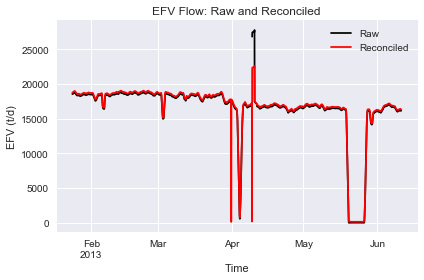

,Raw,Reconciled
count,19858.000000,19872.000000
mean,16372.974511,16526.225864
std,4326.805822,4291.968444
min,7.762986,131.534459
25%,16486.802406,16680.234285
50%,17014.920118,17215.606787
75%,18411.210644,18632.467174
max,27793.614936,22583.321295


In [28]:
EFV_raw  =  M @ yraw[0:5,:]
EFV_rec  =  M @ yrec[0:5,:]
EFV_mat = np.column_stack((EFV_raw.T,EFV_rec.T))
EFVdf = pd.DataFrame(EFV_mat, index=mdot.index)
EFVdf.columns = ['Raw', 'Reconciled']
EFVdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('EFV (t/d)')
plt.title('EFV Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_res.png', dpi = 300)
plt.show()
EFVdf.describe()

### LMR flow

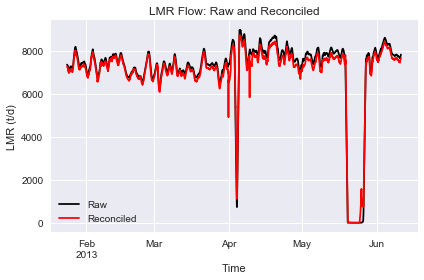

,Raw,Reconciled
count,19872.000000,19872.000000
mean,7133.271955,6977.063436
std,1793.651299,1686.799247
min,2.522360,0.630435
25%,7120.004896,6978.999043
50%,7532.118769,7342.606374
75%,7890.747158,7682.609059
max,8970.772259,8716.857971


In [29]:
LMR_raw  =  M @ yraw[21:26,:]
LMR_rec  =  M @ yrec[21:26,:]
LMR_mat = np.column_stack((LMR_raw.T,LMR_rec.T))
LMRdf = pd.DataFrame(LMR_mat, index=mdot.index)
LMRdf.columns = ['Raw', 'Reconciled']
LMRdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('LMR (t/d)')
plt.title('LMR Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_res.png', dpi = 300)
plt.show()
LMRdf.describe()

### HMR flow

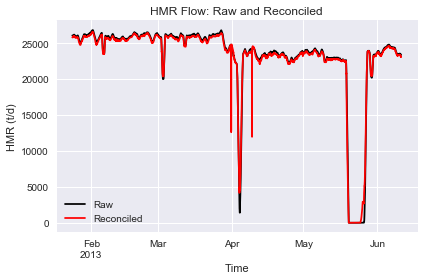

,Raw,Reconciled
count,1.987200e+04,1.987200e+04
mean,2.305170e+04,2.290202e+04
std,5.971844e+03,5.771116e+03
min,2.789813e-11,2.182686e-07
25%,2.330787e+04,2.311374e+04
50%,2.426266e+04,2.410175e+04
75%,2.597785e+04,2.576664e+04
max,2.683770e+04,2.660843e+04


In [30]:
HMR_raw  =  M @ yraw[31:36,:]
HMR_rec  =  M @ yrec[31:36,:]
HMR_mat = np.column_stack((HMR_raw.T,HMR_rec.T))
HMRdf = pd.DataFrame(HMR_mat, index=mdot.index)
HMRdf.columns = ['Raw', 'Reconciled']
HMRdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('HMR (t/d)')
plt.title('HMR Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_res.png', dpi = 300)
plt.show()
HMRdf.describe()

### MRV flow

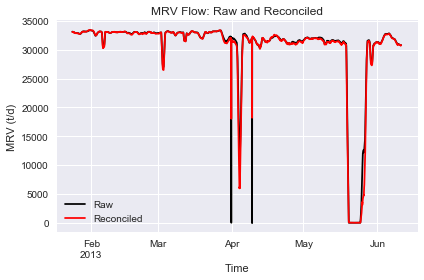

,Raw,Reconciled
count,19871.000000,19872.000000
mean,30374.991886,30157.131186
std,7004.021037,7329.181237
min,0.000000,2.147978
25%,31456.627701,31277.475520
50%,32135.446105,32058.488078
75%,32996.056993,32961.738017
max,33418.404278,33433.703016


In [31]:
MRV_raw  =  M @ yraw[16:21,:]
MRV_rec  =  M @ yrec[16:21,:]
MRV_mat = np.column_stack((MRV_raw.T,MRV_rec.T))
MRVdf = pd.DataFrame(MRV_mat, index=mdot.index)
MRVdf.columns = ['Raw', 'Reconciled']
MRVdf.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('MRV (t/d)')
plt.title('MRV Flow: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_res.png', dpi = 300)
plt.show()
MRVdf.describe()

### MRV Composition

In [32]:
NC1_raw = yraw[16,:]
NC2_raw = yraw[17,:]
NC3_raw = yraw[18,:]
NC4_raw = yraw[19,:]
NN2_raw = yraw[20,:]
Ntot_raw = NC1_raw + NC2_raw + NC3_raw + NC4_raw + NN2_raw
#####
MRV_C1_raw = 100.0 * NC1_raw / Ntot_raw
MRV_C2_raw = 100.0 * NC2_raw / Ntot_raw
MRV_C3_raw = 100.0 * NC3_raw / Ntot_raw
MRV_C4_raw = 100.0 * NC4_raw / Ntot_raw
MRV_N2_raw = 100.0 * NN2_raw / Ntot_raw

C:\Apps\Dir\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Apps\Dir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Apps\Dir\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Apps\Dir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Apps\Dir\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [33]:
NC1_rec = yrec[16,:]
NC2_rec = yrec[17,:]
NC3_rec = yrec[18,:]
NC4_rec = yrec[19,:]
NN2_rec = yrec[20,:]
Ntot_rec = NC1_rec + NC2_rec + NC3_rec + NC4_rec + NN2_rec
######
MRV_C1_rec = 100.0 * NC1_rec / Ntot_rec
MRV_C2_rec = 100.0 * NC2_rec / Ntot_rec
MRV_C3_rec = 100.0 * NC3_rec / Ntot_rec
MRV_C4_rec = 100.0 * NC4_rec / Ntot_rec
MRV_N2_rec = 100.0 * NN2_rec / Ntot_rec

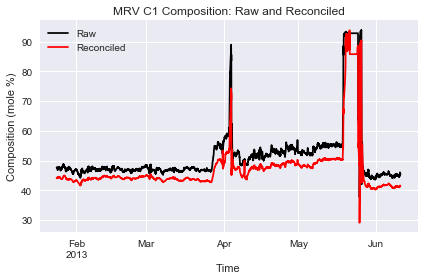

,Raw,Reconciled
count,19858.000000,19872.000000
mean,51.638382,47.581998
std,10.213200,9.223590
min,37.658603,29.095789
25%,46.686727,43.624408
50%,47.610287,44.511482
75%,53.331007,48.604919
max,93.870050,93.818471


In [34]:
MRV_C1_mat = np.column_stack((MRV_C1_raw.T,MRV_C1_rec.T))
MRV_C1_df = pd.DataFrame(MRV_C1_mat, index=mdot.index)
MRV_C1_df.columns = ['Raw', 'Reconciled']
MRV_C1_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('MRV C1 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_C1_res.png', dpi = 300)
plt.show()
MRV_C1_df.describe()

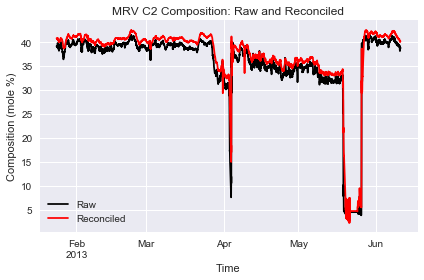

,Raw,Reconciled
count,19858.000000,19872.000000
mean,35.513493,36.946794
std,8.054482,7.902379
min,3.793484,2.235986
25%,34.437684,35.845699
50%,38.550944,39.855238
75%,39.616178,40.887692
max,41.572793,42.546845


In [35]:
MRV_C2_mat = np.column_stack((MRV_C2_raw.T,MRV_C2_rec.T))
MRV_C2_df = pd.DataFrame(MRV_C2_mat, index=mdot.index)
MRV_C2_df.columns = ['Raw', 'Reconciled']
MRV_C2_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('MRV C2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_C2_res.png', dpi = 300)
plt.show()
MRV_C2_df.describe()

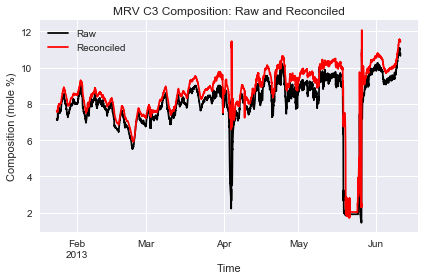

,Raw,Reconciled
count,19858.000000,19872.000000
mean,7.948832,8.555982
std,1.717208,1.689842
min,1.448892,1.723249
25%,7.519472,7.960995
50%,8.202850,8.736312
75%,8.976763,9.666609
max,11.098809,12.070233


In [36]:
MRV_C3_mat = np.column_stack((MRV_C3_raw.T,MRV_C3_rec.T))
MRV_C3_df = pd.DataFrame(MRV_C3_mat, index=mdot.index)
MRV_C3_df.columns = ['Raw', 'Reconciled']
MRV_C3_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('MRV C3 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_C3_res.png', dpi = 300)
plt.show()
MRV_C3_df.describe()

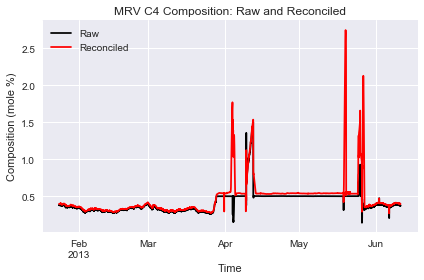

,Raw,Reconciled
count,19858.000000,19872.000000
mean,0.416247,0.473382
std,0.140365,0.249443
min,0.141877,0.268894
25%,0.317853,0.331908
50%,0.376006,0.397159
75%,0.501829,0.538992
max,1.500475,2.746845


In [37]:
MRV_C4_mat = np.column_stack((MRV_C4_raw.T,MRV_C4_rec.T))
MRV_C4_df = pd.DataFrame(MRV_C4_mat, index=mdot.index)
MRV_C4_df.columns = ['Raw', 'Reconciled']
MRV_C4_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('MRV C4 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_C4_res.png', dpi = 300)
plt.show()
MRV_C4_df.describe()

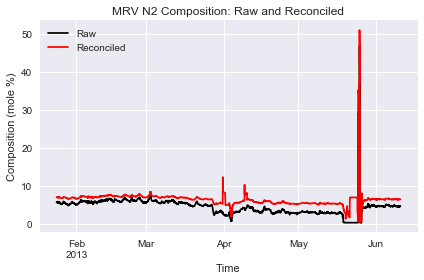

,Raw,Reconciled
count,19858.000000,19872.000000
mean,4.483046,6.441845
std,2.516454,2.465436
min,0.285263,0.450200
25%,3.044150,5.475519
50%,4.681644,6.498489
75%,5.695254,7.045271
max,46.873168,51.061884


In [38]:
MRV_N2_mat = np.column_stack((MRV_N2_raw.T,MRV_N2_rec.T))
MRV_N2_df = pd.DataFrame(MRV_N2_mat, index=mdot.index)
MRV_N2_df.columns = ['Raw', 'Reconciled']
MRV_N2_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('MRV N2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('MRV_N2_res.png', dpi = 300)
plt.show()
MRV_N2_df.describe()

### LMR Composition

In [39]:
NC1_raw = yraw[21,:]
NC2_raw = yraw[22,:]
NC3_raw = yraw[23,:]
NC4_raw = yraw[24,:]
NN2_raw = yraw[25,:]
Ntot_raw = NC1_raw + NC2_raw + NC3_raw + NC4_raw + NN2_raw
#####
LMR_C1_raw = 100.0 * NC1_raw / Ntot_raw
LMR_C2_raw = 100.0 * NC2_raw / Ntot_raw
LMR_C3_raw = 100.0 * NC3_raw / Ntot_raw
LMR_C4_raw = 100.0 * NC4_raw / Ntot_raw
LMR_N2_raw = 100.0 * NN2_raw / Ntot_raw

In [40]:
NC1_rec = yrec[21,:]
NC2_rec = yrec[22,:]
NC3_rec = yrec[23,:]
NC4_rec = yrec[24,:]
NN2_rec = yrec[25,:]
Ntot_rec = NC1_rec + NC2_rec + NC3_rec + NC4_rec + NN2_rec
######
LMR_C1_rec = 100.0 * NC1_rec / Ntot_rec
LMR_C2_rec = 100.0 * NC2_rec / Ntot_rec
LMR_C3_rec = 100.0 * NC3_rec / Ntot_rec
LMR_C4_rec = 100.0 * NC4_rec / Ntot_rec
LMR_N2_rec = 100.0 * NN2_rec / Ntot_rec

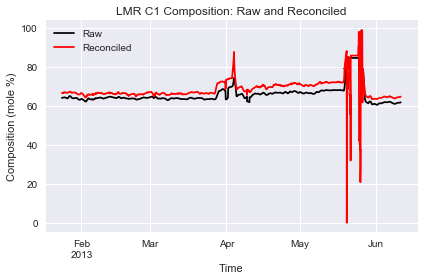

,Raw,Reconciled
count,19872.000000,19872.000000
mean,65.763729,68.602313
std,4.578159,5.564297
min,60.487773,0.000002
25%,63.581321,66.033852
50%,64.198744,66.780050
75%,66.729701,70.696593
max,84.836587,98.859755


In [41]:
LMR_C1_mat = np.column_stack((LMR_C1_raw.T,LMR_C1_rec.T))
LMR_C1_df = pd.DataFrame(LMR_C1_mat, index=mdot.index)
LMR_C1_df.columns = ['Raw', 'Reconciled']
LMR_C1_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('LMR C1 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_C1_res.png', dpi = 300)
plt.show()
LMR_C1_df.describe()

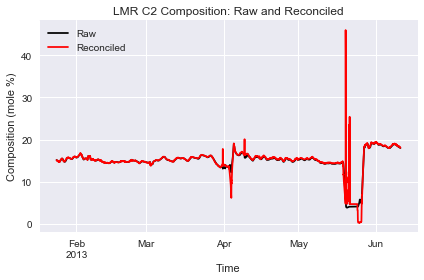

,Raw,Reconciled
count,19872.000000,19872.000000
mean,14.955179,15.026031
std,2.753748,2.930501
min,3.845770,0.256573
25%,14.670922,14.681963
50%,15.213249,15.339925
75%,15.756317,15.866044
max,19.294968,45.969727


In [42]:
LMR_C2_mat = np.column_stack((LMR_C2_raw.T,LMR_C2_rec.T))
LMR_C2_df = pd.DataFrame(LMR_C2_mat, index=mdot.index)
LMR_C2_df.columns = ['Raw', 'Reconciled']
LMR_C2_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('LMR C2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_C2_res.png', dpi = 300)
plt.show()
LMR_C2_df.describe()

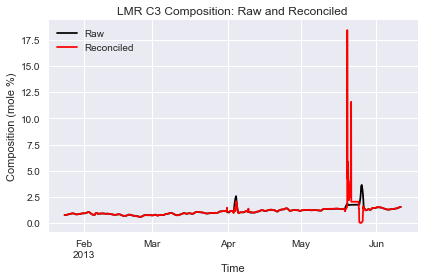

,Raw,Reconciled
count,19872.000000,19872.000000
mean,1.116842,1.121017
std,0.345276,0.585295
min,0.589313,0.033445
25%,0.886253,0.879791
50%,1.055106,1.057653
75%,1.286229,1.280319
max,3.636164,18.422639


In [43]:
LMR_C3_mat = np.column_stack((LMR_C3_raw.T,LMR_C3_rec.T))
LMR_C3_df = pd.DataFrame(LMR_C3_mat, index=mdot.index)
LMR_C3_df.columns = ['Raw', 'Reconciled']
LMR_C3_df.plot(color=['k','r'])
#plt.ylim((-2000,2000))
plt.ylabel('Composition (mole %)')
plt.title('LMR C3 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_C3_res.png', dpi = 300)
plt.show()
LMR_C3_df.describe()

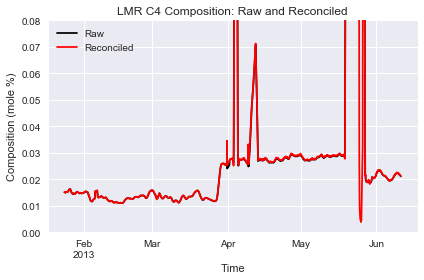

,Raw,Reconciled
count,19872.000000,19872.000000
mean,0.047874,0.049789
std,0.108469,0.167652
min,0.011044,0.003895
25%,0.013367,0.013331
50%,0.020408,0.020142
75%,0.027705,0.027931
max,0.750530,4.298250


In [44]:
LMR_C4_mat = np.column_stack((LMR_C4_raw.T,LMR_C4_rec.T))
LMR_C4_df = pd.DataFrame(LMR_C4_mat, index=mdot.index)
LMR_C4_df.columns = ['Raw', 'Reconciled']
LMR_C4_df.plot(color=['k','r'])
plt.ylim((0,0.08))
plt.ylabel('Composition (mole %)')
plt.title('LMR C4 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_C4_res.png', dpi = 300)
plt.show()
LMR_C4_df.describe()

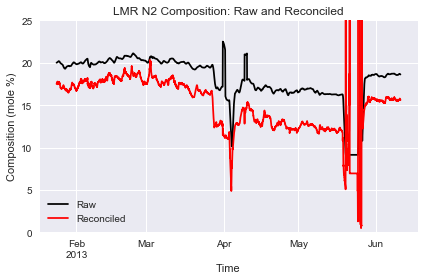

,Raw,Reconciled
count,19872.000000,19872.000000
mean,18.116377,15.200850
std,2.618755,4.576118
min,9.146079,0.507513
25%,16.753265,12.642271
50%,18.656699,15.669501
75%,20.053848,17.582180
max,22.506418,78.758868


In [45]:
LMR_N2_mat = np.column_stack((LMR_N2_raw.T,LMR_N2_rec.T))
LMR_N2_df = pd.DataFrame(LMR_N2_mat, index=mdot.index)
LMR_N2_df.columns = ['Raw', 'Reconciled']
LMR_N2_df.plot(color=['k','r'])
plt.ylim((0,25))
plt.ylabel('Composition (mole %)')
plt.title('LMR N2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('LMR_N2_res.png', dpi = 300)
plt.show()
LMR_N2_df.describe()

### HMR Composition

In [46]:
NC1_raw = yraw[31,:]
NC2_raw = yraw[32,:]
NC3_raw = yraw[33,:]
NC4_raw = yraw[34,:]
NN2_raw = yraw[35,:]
Ntot_raw = NC1_raw + NC2_raw + NC3_raw + NC4_raw + NN2_raw
#####
HMR_C1_raw = 100.0 * NC1_raw / Ntot_raw
HMR_C2_raw = 100.0 * NC2_raw / Ntot_raw
HMR_C3_raw = 100.0 * NC3_raw / Ntot_raw
HMR_C4_raw = 100.0 * NC4_raw / Ntot_raw
HMR_N2_raw = 100.0 * NN2_raw / Ntot_raw

In [47]:
NC1_rec = yrec[31,:]
NC2_rec = yrec[32,:]
NC3_rec = yrec[33,:]
NC4_rec = yrec[34,:]
NN2_rec = yrec[35,:]
Ntot_rec = NC1_rec + NC2_rec + NC3_rec + NC4_rec + NN2_rec
######
HMR_C1_rec = 100.0 * NC1_rec / Ntot_rec
HMR_C2_rec = 100.0 * NC2_rec / Ntot_rec
HMR_C3_rec = 100.0 * NC3_rec / Ntot_rec
HMR_C4_rec = 100.0 * NC4_rec / Ntot_rec
HMR_N2_rec = 100.0 * NN2_rec / Ntot_rec

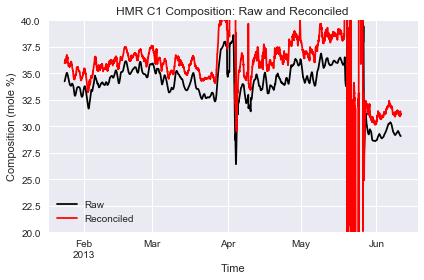

,Raw,Reconciled
count,19872.000000,19872.000000
mean,35.998917,36.051660
std,9.872328,6.929080
min,26.437971,0.000007
25%,33.360093,34.815833
50%,34.354278,36.082450
75%,35.444643,37.148125
max,84.743125,87.235157


In [48]:
HMR_C1_mat = np.column_stack((HMR_C1_raw.T,HMR_C1_rec.T))
HMR_C1_df = pd.DataFrame(HMR_C1_mat, index=mdot.index)
HMR_C1_df.columns = ['Raw', 'Reconciled']
HMR_C1_df.plot(color=['k','r'])
plt.ylim((20,40))
plt.ylabel('Composition (mole %)')
plt.title('HMR C1 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_C1_res.png', dpi = 300)
plt.show()
HMR_C1_df.describe()

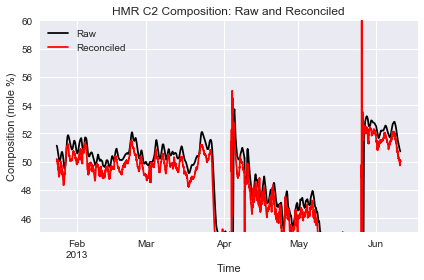

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,46.883844,4.654027e+01
std,9.883791,8.600711e+00
min,3.930101,5.568104e-07
25%,46.930471,4.621294e+01
50%,50.060181,4.928439e+01
75%,50.888088,5.020834e+01
max,53.716462,5.999590e+01


In [49]:
HMR_C2_mat = np.column_stack((HMR_C2_raw.T,HMR_C2_rec.T))
HMR_C2_df = pd.DataFrame(HMR_C2_mat, index=mdot.index)
HMR_C2_df.columns = ['Raw', 'Reconciled']
HMR_C2_df.plot(color=['k','r'])
plt.ylim((45,60))
plt.ylabel('Composition (mole %)')
plt.title('HMR C2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_C2_res.png', dpi = 300)
plt.show()
HMR_C2_df.describe()

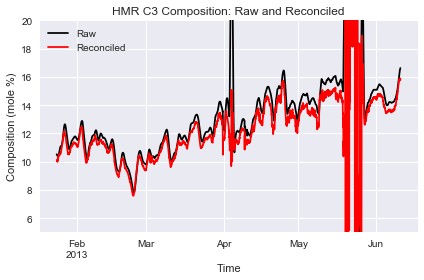

,Raw,Reconciled
count,19872.000000,19872.000000
mean,12.568465,12.291930
std,3.159039,2.577868
min,1.722859,0.000110
25%,11.203130,10.986306
50%,12.408696,12.015711
75%,14.362289,13.651407
max,27.343499,58.182857


In [50]:
HMR_C3_mat = np.column_stack((HMR_C3_raw.T,HMR_C3_rec.T))
HMR_C3_df = pd.DataFrame(HMR_C3_mat, index=mdot.index)
HMR_C3_df.columns = ['Raw', 'Reconciled']
HMR_C3_df.plot(color=['k','r'])
plt.ylim((5,20))
plt.ylabel('Composition (mole %)')
plt.title('HMR C3 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_C3_res.png', dpi = 300)
plt.show()
HMR_C3_df.describe()

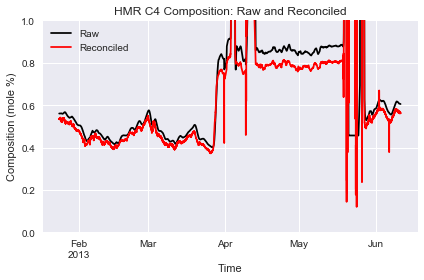

,Raw,Reconciled
count,19872.000000,19872.000000
mean,0.965872,1.208982
std,1.887518,3.387158
min,0.401647,0.120411
25%,0.463540,0.448527
50%,0.562195,0.544425
75%,0.854503,0.791246
max,17.949452,99.999732


In [51]:
HMR_C4_mat = np.column_stack((HMR_C4_raw.T,HMR_C4_rec.T))
HMR_C4_df = pd.DataFrame(HMR_C4_mat, index=mdot.index)
HMR_C4_df.columns = ['Raw', 'Reconciled']
HMR_C4_df.plot(color=['k','r'])
plt.ylim((0,1.0))
plt.ylabel('Composition (mole %)')
plt.title('HMR C4 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_C4_res.png', dpi = 300)
plt.show()
HMR_C4_df.describe()

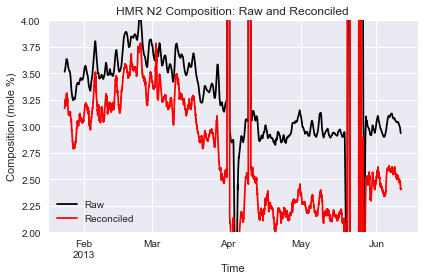

,Raw,Reconciled
count,19872.000000,1.987200e+04
mean,3.582902,3.907157e+00
std,1.479393,6.275910e+00
min,1.170356,7.128026e-09
25%,2.950574,2.247965e+00
50%,3.278294,2.823158e+00
75%,3.594959,3.247168e+00
max,14.106106,6.309651e+01


In [52]:
HMR_N2_mat = np.column_stack((HMR_N2_raw.T,HMR_N2_rec.T))
HMR_N2_df = pd.DataFrame(HMR_N2_mat, index=mdot.index)
HMR_N2_df.columns = ['Raw', 'Reconciled']
HMR_N2_df.plot(color=['k','r'])
plt.ylim((2,4))
plt.ylabel('Composition (mole %)')
plt.title('HMR N2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('HMR_N2_res.png', dpi = 300)
plt.show()
HMR_N2_df.describe()

### EFV Composition

In [53]:
NC1_raw = yraw[0,:]
NC2_raw = yraw[1,:]
NC3_raw = yraw[2,:]
NC4_raw = yraw[3,:]
NN2_raw = yraw[4,:]
Ntot_raw = NC1_raw + NC2_raw + NC3_raw + NC4_raw + NN2_raw
#####
EFV_C1_raw = 100.0 * NC1_raw / Ntot_raw
EFV_C2_raw = 100.0 * NC2_raw / Ntot_raw
EFV_C3_raw = 100.0 * NC3_raw / Ntot_raw
EFV_C4_raw = 100.0 * NC4_raw / Ntot_raw
EFV_N2_raw = 100.0 * NN2_raw / Ntot_raw

In [54]:
NC1_rec = yrec[0,:]
NC2_rec = yrec[1,:]
NC3_rec = yrec[2,:]
NC4_rec = yrec[3,:]
NN2_rec = yrec[4,:]
Ntot_rec = NC1_rec + NC2_rec + NC3_rec + NC4_rec + NN2_rec
######
EFV_C1_rec = 100.0 * NC1_rec / Ntot_rec
EFV_C2_rec = 100.0 * NC2_rec / Ntot_rec
EFV_C3_rec = 100.0 * NC3_rec / Ntot_rec
EFV_C4_rec = 100.0 * NC4_rec / Ntot_rec
EFV_N2_rec = 100.0 * NN2_rec / Ntot_rec

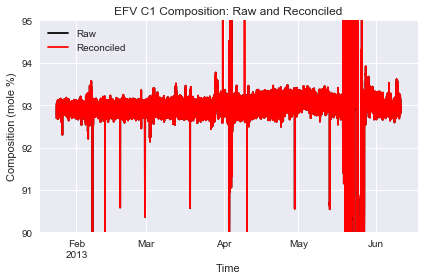

,Raw,Reconciled
count,19858.000000,19872.000000
mean,93.022404,93.029450
std,1.107876,1.117582
min,77.464834,77.647843
25%,92.847381,92.847443
50%,92.970462,92.970537
75%,93.102361,93.102570
max,99.664235,100.000000


In [55]:
EFV_C1_mat = np.column_stack((EFV_C1_raw.T,EFV_C1_rec.T))
EFV_C1_df = pd.DataFrame(EFV_C1_mat, index=mdot.index)
EFV_C1_df.columns = ['Raw', 'Reconciled']
EFV_C1_df.plot(color=['k','r'])
plt.ylim((90,95))
plt.ylabel('Composition (mole %)')
plt.title('EFV C1 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_C1_res.png', dpi = 300)
plt.show()
EFV_C1_df.describe()

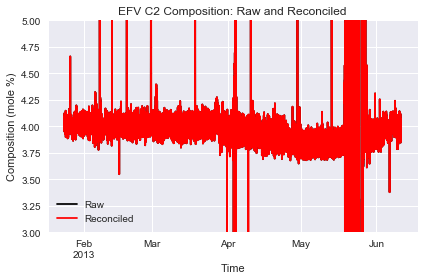

,Raw,Reconciled
count,19858.000000,19872.000000
mean,3.922133,3.917901
std,0.668010,0.672104
min,0.000000,0.000000
25%,3.880483,3.880452
50%,3.959802,3.959677
75%,4.033440,4.033471
max,13.112778,12.986013


In [56]:
EFV_C2_mat = np.column_stack((EFV_C2_raw.T,EFV_C2_rec.T))
EFV_C2_df = pd.DataFrame(EFV_C2_mat, index=mdot.index)
EFV_C2_df.columns = ['Raw', 'Reconciled']
EFV_C2_df.plot(color=['k','r'])
plt.ylim((3,5))
plt.ylabel('Composition (mole %)')
plt.title('EFV C2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_C2_res.png', dpi = 300)
plt.show()
EFV_C2_df.describe()

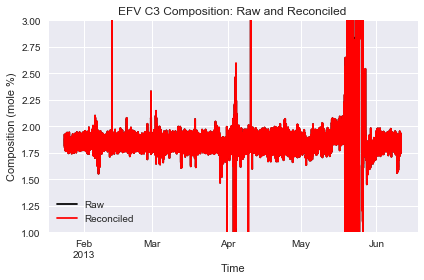

,Raw,Reconciled
count,19858.000000,19872.000000
mean,1.835461,1.833706
std,0.354045,0.355404
min,0.006155,0.000000
25%,1.791802,1.791761
50%,1.843891,1.843866
75%,1.895057,1.895065
max,7.328309,7.269374


In [57]:
EFV_C3_mat = np.column_stack((EFV_C3_raw.T,EFV_C3_rec.T))
EFV_C3_df = pd.DataFrame(EFV_C3_mat, index=mdot.index)
EFV_C3_df.columns = ['Raw', 'Reconciled']
EFV_C3_df.plot(color=['k','r'])
plt.ylim((1,3))
plt.ylabel('Composition (mole %)')
plt.title('EFV C3 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_C3_res.png', dpi = 300)
plt.show()
EFV_C3_df.describe()

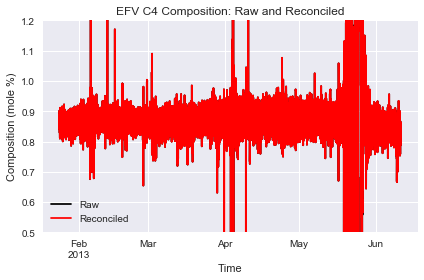

,Raw,Reconciled
count,19858.000000,19872.000000
mean,0.855311,0.854704
std,0.168503,0.169657
min,0.000624,0.000000
25%,0.835917,0.835922
50%,0.863701,0.863724
75%,0.891831,0.891890
max,5.200099,5.180202


In [58]:
EFV_C4_mat = np.column_stack((EFV_C4_raw.T,EFV_C4_rec.T))
EFV_C4_df = pd.DataFrame(EFV_C4_mat, index=mdot.index)
EFV_C4_df.columns = ['Raw', 'Reconciled']
EFV_C4_df.plot(color=['k','r'])
plt.ylim((0.5,1.2))
plt.ylabel('Composition (mole %)')
plt.title('EFV C4 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_C4_res.png', dpi = 300)
plt.show()
EFV_C4_df.describe()

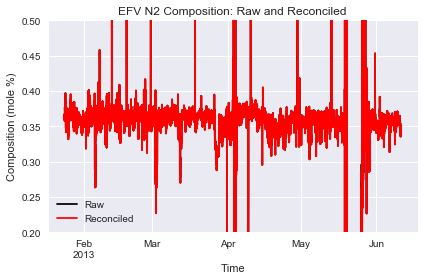

,Raw,Reconciled
count,19858.000000,19872.000000
mean,0.364690,0.364238
std,0.344839,0.344296
min,0.000000,0.000000
25%,0.351154,0.351027
50%,0.359717,0.359614
75%,0.366362,0.366276
max,10.084449,10.082752


In [59]:
EFV_N2_mat = np.column_stack((EFV_N2_raw.T,EFV_N2_rec.T))
EFV_N2_df = pd.DataFrame(EFV_N2_mat, index=mdot.index)
EFV_N2_df.columns = ['Raw', 'Reconciled']
EFV_N2_df.plot(color=['k','r'])
plt.ylim((0.2,0.5))
plt.ylabel('Composition (mole %)')
plt.title('EFV N2 Composition: Raw and Reconciled')
plt.tight_layout()
plt.savefig('EFV_N2_res.png', dpi = 300)
plt.show()
EFV_N2_df.describe()

### Ideal LMR-Bleed calculation

In [60]:
leak_rec = M @ yrec[11:16,:]
w_leak_C1_rec = M[0,0] * yrec[11,:] / leak_rec
w_leak_C2_rec = M[0,1] * yrec[12,:] / leak_rec
w_leak_C3_rec = M[0,2] * yrec[13,:] / leak_rec
w_leak_C4_rec = M[0,3] * yrec[14,:] / leak_rec
w_leak_N2_rec = M[0,4] * yrec[15,:] / leak_rec

In [61]:
leak_raw = M @ yraw[11:16,:]
w_leak_C1_raw = M[0,0] * yraw[11,:] / leak_raw
w_leak_C2_raw = M[0,1] * yraw[12,:] / leak_raw
w_leak_C3_raw = M[0,2] * yraw[13,:] / leak_raw
w_leak_C4_raw = M[0,3] * yraw[14,:] / leak_raw
w_leak_N2_raw = M[0,4] * yraw[15,:] / leak_raw

In [62]:
LMR_rec = M @ yrec[21:26,:]
w_LMR_C1_rec = M[0,0] * yrec[21,:] / LMR_rec
w_LMR_C2_rec = M[0,1] * yrec[22,:] / LMR_rec
w_LMR_C3_rec = M[0,2] * yrec[23,:] / LMR_rec
w_LMR_C4_rec = M[0,3] * yrec[24,:] / LMR_rec
w_LMR_N2_rec = M[0,4] * yrec[25,:] / LMR_rec

In [63]:
LMR_raw = M @ yraw[21:26,:]
w_LMR_C1_raw = M[0,0] * yraw[21,:] / LMR_raw
w_LMR_C2_raw = M[0,1] * yraw[22,:] / LMR_raw
w_LMR_C3_raw = M[0,2] * yraw[23,:] / LMR_raw
w_LMR_C4_raw = M[0,3] * yraw[24,:] / LMR_raw
w_LMR_N2_raw = M[0,4] * yraw[25,:] / LMR_raw

In [64]:
print(leak_rec.shape)
print(w_leak_C1_rec.shape)
print(w_LMR_C1_rec.shape)

(1, 19872)
(1, 19872)
(1, 19872)


In [65]:
BleedL_ideal = np.multiply(leak_rec , np.divide(w_leak_C1_rec , w_LMR_C1_rec))
BleedL_calc = np.multiply(leak_raw , np.divide(w_leak_C1_raw , w_LMR_C1_raw))

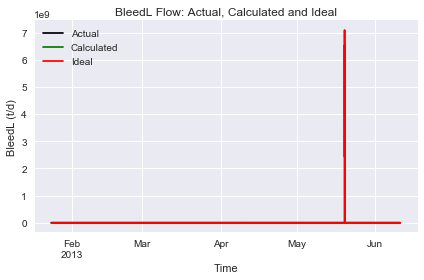

,Actual,Calculated,Ideal
count,19872.000000,19858.000000,1.987200e+04
mean,316.943897,425.553510,9.355861e+05
std,434.189035,602.275800,7.120105e+07
min,0.000000,-373.678127,3.508991e-09
25%,0.000000,-15.480821,8.608182e+00
50%,1.823790,-2.306320,1.211989e+01
75%,747.523685,1029.553524,8.011012e+02
max,1183.307080,1626.437298,7.098932e+09


In [66]:
BleedL_raw  =  M @ yraw[26:31,:]
BleedL_mat = np.column_stack((BleedL_raw.T,BleedL_calc.T,BleedL_ideal.T))
BleedLdf = pd.DataFrame(BleedL_mat, index=mdot.index)
BleedLdf.columns = ['Actual', 'Calculated','Ideal']
BleedLdf.plot(color=['k','g','r'])
#plt.ylim((-100,800))
plt.ylabel('BleedL (t/d)')
plt.title('BleedL Flow: Actual, Calculated and Ideal')
plt.tight_layout()
plt.savefig('BleedL_ideal.png', dpi = 300)
plt.show()
BleedLdf.describe()

### Ideal C2 make-up calculation

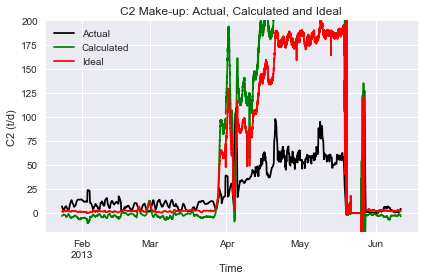

,Actual,Calculated,Ideal
count,1.987200e+04,19858.000000,1.987200e+04
mean,2.399422e+01,74.650751,3.722952e+05
std,2.534166e+01,106.783707,2.843884e+07
min,4.366766e-14,-78.383968,-1.416381e+02
25%,5.233690e+00,-2.904474,1.943030e+00
50%,1.143856e+01,-0.483793,2.789376e+00
75%,4.682514e+01,185.245927,1.342444e+02
max,1.269702e+02,312.226613,2.980921e+09


In [67]:
C2_ideal = np.multiply(BleedL_ideal , w_LMR_C2_rec) - np.multiply(leak_rec , w_leak_C2_rec)
C2_calc = np.multiply(BleedL_calc , w_LMR_C2_raw) - np.multiply(leak_raw , w_leak_C2_raw)
C2_actual = M[0,1] * yraw[42,:] + M[0,1] * yraw[45,:]
C2_mat = np.column_stack((C2_actual.T,C2_calc.T,C2_ideal.T))
C2df = pd.DataFrame(C2_mat, index=mdot.index)
C2df.columns = ['Actual', 'Calculated','Ideal']
C2df.plot(color=['k','g','r'])
plt.ylim((-20,200))
plt.ylabel('C2 (t/d)')
plt.title('C2 Make-up: Actual, Calculated and Ideal')
plt.tight_layout()
plt.savefig('C2mkup_ideal.png', dpi = 300)
plt.show()
C2df.describe()

### Ideal C3 make-up calculation

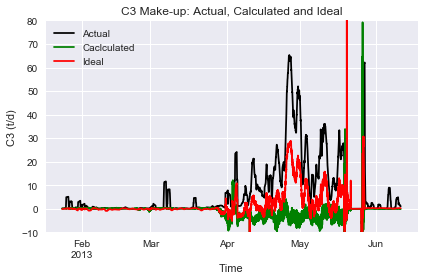

,Actual,Caclculated,Ideal
count,19872.000000,19858.000000,1.987200e+04
mean,7.491949,-0.901365,2.190906e+05
std,12.767555,3.742154,1.657689e+07
min,0.000000,-55.663726,-8.350247e+01
25%,0.215206,-2.126088,-1.875099e-01
50%,1.051781,-0.008489,1.208443e-01
75%,9.390723,0.137439,6.933526e-01
max,65.332578,79.216321,1.639912e+09


In [68]:
C3_ideal = np.multiply(BleedL_ideal , w_LMR_C3_rec) - np.multiply(leak_rec , w_leak_C3_rec)
C3_calc = np.multiply(BleedL_calc , w_LMR_C3_raw) - np.multiply(leak_raw , w_leak_C3_raw)
C3_actual = M[0,2] * yraw[43,:] + M[0,2] * yraw[46,:]
C3_mat = np.column_stack((C3_actual.T,C3_calc.T,C3_ideal.T))
C3df = pd.DataFrame(C3_mat, index=mdot.index)
C3df.columns = ['Actual','Caclculated','Ideal']
C3df.plot(color=['k','g','r'])
plt.ylim((-10,80))
plt.ylabel('C3 (t/d)')
plt.title('C3 Make-up: Actual, Calculated and Ideal')
plt.tight_layout()
plt.savefig('C3mkup_ideal.png', dpi = 300)
plt.show()
C3df.describe()

### Ideal N2 make-up calculation

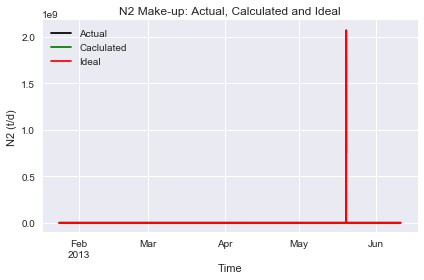

,Actual,Caclulated,Ideal
count,19872.000000,19858.000000,1.987200e+04
mean,23.547240,94.884248,2.766216e+05
std,32.142976,134.768753,2.117679e+07
min,0.000000,-80.108292,-3.032517e+01
25%,1.175225,-4.012481,1.969305e+00
50%,1.975003,-0.619618,2.791527e+00
75%,65.237660,234.777508,1.382920e+02
max,79.008164,358.845822,2.072079e+09


In [69]:
N2_ideal = np.multiply(BleedL_ideal , w_LMR_N2_rec) - np.multiply(leak_rec , w_leak_N2_rec)
N2_calc = np.multiply(BleedL_calc , w_LMR_N2_raw) - np.multiply(leak_raw , w_leak_N2_raw)
N2_actual = M[0,4] * yraw[44,:]
N2_mat = np.column_stack((N2_actual.T,N2_calc.T,N2_ideal.T))
N2df = pd.DataFrame(N2_mat, index=mdot.index)
N2df.columns = ['Actual','Caclulated','Ideal']
N2df.plot(color=['k','g','r'])
#plt.ylim((-20,200))
plt.ylabel('N2 (t/d)')
plt.title('N2 Make-up: Actual, Calculated and Ideal')
plt.tight_layout()
plt.savefig('N2mkup_ideal.png', dpi = 300)
plt.show()
N2df.describe()

### C4 Accumulation

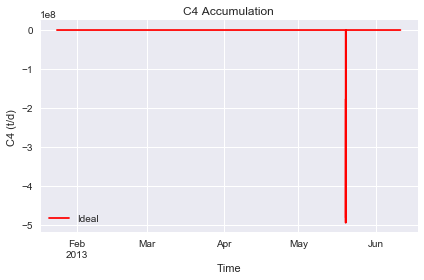

,Ideal
count,1.987200e+04
mean,-6.735349e+04
std,5.091768e+06
min,-4.938488e+08
25%,2.196085e-02
50%,5.244804e-02
75%,3.025439e-01
max,2.001885e+01


In [70]:
C4_accum = - np.multiply(BleedL_ideal , w_LMR_C4_rec) + np.multiply(leak_rec , w_leak_C4_rec)
C4df = pd.DataFrame(C4_accum.T, index=mdot.index)
C4df.columns = ['Ideal']
C4df.plot(color=['r'])
#plt.ylim((-0.2,0.3))
plt.ylabel('C4 (t/d)')
plt.title('C4 Accumulation')
plt.tight_layout()
plt.savefig('C4_accum.png', dpi = 300)
plt.show()
C4df.describe()